## Workshop 3. Advances AI - Statistics Module

**Mariana Castro Payns - A01706038**

**2. Hypothesis  testing - comparing the mean of two groups**

We will no a hypothesis testing to compare the means of two groups. This test is usually named *two-sample t-test*.

In this case we try yo check wheter the mean of a group is greater than the mean of another group. 

If we have two random variables x and Y and we take a random sample of each variable to check whether the mean of X is greater than the mean of Y. 

We start writing the null and alternative hypotesis as follows:

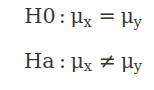

We do simple algebra to leave a nummber in the right-hand side of the equality and a random variable in the left-hand side of the equation. Then. we re-write these hypothesis as:

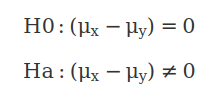

The Greek letter is used to represent the population mean of a variable. 

To test this hypothesis we take a random sample of X and Y and calculate their means. 

In this case, the variable of study is the difference of 2 means, then we can name the variable of study as diff:

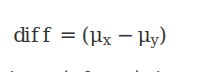

Since we use sample means instead of population means, we can redifine this difference as:

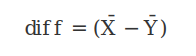

The calculation of the standard deviation of the variable of study changes in each case. 

For the case of one-sample-test, the std error is calculated as:

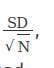

In the case of two-sample-test, the standard errror SE can be calculates as:

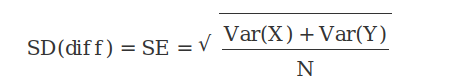

**3. Confidence Level, Type I Error and PValue**

The confidence level is related to the error level of the test. For a confidence level of 95% there is a probability that we mistaken conclusion if rejecting the null hypothesis. Then, for a 95% confidence level, we can end up in a mistaken conclusion 5% of the time, this error is also called Type I Error.

The pvalue is the probability thet we will be wrong if we reject the null hypotesis. 

For each value of a t-statistic, there is a corresponding p-value.

The 2-tailed pvalue will always be twice the value of 1-tailed pvalue since the t-Students distribution is symetric. 

We always want to have a very small pvalue in order to reject H0. Then, the 1-tailed pvalue seems to be the one to use. 

The use of p-values depends on the context, when there is a theory that supports the alternative hypothesis, we can use the 1-tailed pvalue. 

***3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?***

Do a t-test to check wheter the mean monthly cc return of AMD is greater than the mean monthly return of Intel. Use data from Jan 2017 to date

In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [3]:
# Get data 
pricedata = pdr.get_data_yahoo(['AMD', 'INTC'], start = "01/01/2017", end = "08/18/2022", interval="m")
pricedata = pricedata['Adj Close']

# Calcualte CC Returns
returns = np.log(pricedata) - np.log(pricedata.shift(1))

# Drop empty/NaN values
returns = returns.dropna()


*Definition of hypothesis*

Null Hypothesis - HO: (mean(returnsAMD) - (mean(returnsIntel)) = 0

Alternative Hypothesis - Ha: (mean(returnsAMD) - (mean(returnsIntel)) >< 0

In [4]:
# Calculate std error of the difference of the means:

N = pricedata['AMD'].count()
amdvar = pricedata['AMD'].var()
intelvar = pricedata['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (pricedata['AMD'].mean() - pricedata['INTC'].mean()) / sediff
print("Standard Error of the mean difference: ", N)
print("T Statistics value: ", t)

Standard Error of the mean difference:  68
T Statistics value:  1.4756427682447517


> INTERPRETATION:

IN THIS CASE THE T-VALUE IS EQUAL TO 1.47, WHICH MEANS THE APPROX PVALUES ARE (FOR N > 68):

In [5]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
print("P Value:" ,pvalue)

P Value: 0.14438133546734663


> INTERPRETATION:

THE CALCULATION OF THE PVALUE INDICATES THAT THE 1-TAILED PVALUE HAS ABOUT A 0.856 CONFIDENCE VALUE THIS IN PORCENTAJE WOULD BE A 86%

In [6]:
# Using the ttest_ind function from stats:
st.ttest_ind(pricedata['AMD'],pricedata['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.4756427682447517, pvalue=0.14438133546734658)

In [7]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(pricedata['AMD'],pricedata['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

(   Variable      N       Mean         SD        SE  95% Conf.   Interval
 0       AMD   68.0  52.467647  39.705232  4.814967  42.856933  62.078361
 1      INTC   68.0  45.222917   7.908190  0.959009  43.308727  47.137107
 2  combined  136.0  48.845282  28.751881  2.465453  43.969374  53.721190,
                Welch's t-test  results
 0  Difference (AMD - INTC) =    7.2447
 1       Degrees of freedom =   72.4658
 2                        t =    1.4756
 3    Two side test p value =    0.1444
 4   Difference < 0 p value =    0.9278
 5   Difference > 0 p value =    0.0722
 6                Cohen's d =    0.2531
 7                Hedge's g =    0.2517
 8            Glass's delta =    0.1825
 9              Pearson's r =    0.1708)

> INTERPRETARION:

HERE WE CAN SEE A SUMMARY OF THE RESULTS AND CALCULATED VALUES, FIRST WE CAN SEE A NUMBER OF SAMPLES OF 68, AND THE DIFFERENCE BETWEEN AMD AND INTEL IS 7.24 ALSO WE GET THE SAME T VALUE OF 1.47.

**4. Measures of Linear Relationship**

We might be interested in learning wheter ther is a pattern of movement of a random variable when another random variable moves up or down. 

The main two measures of linear relationship between 2 random variables are:

*   Covariance
*   Correlation

As an example we want to check wheter there is a relationship between the s&P500 and Microsoft Stock.


In [8]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


GSPC stands for Global Standard & Poors Composite, which is the S&P500 index. 

Now we will do some plots to learn about the possible relationship between GSP and MSFT. 

<Figure size 432x288 with 0 Axes>

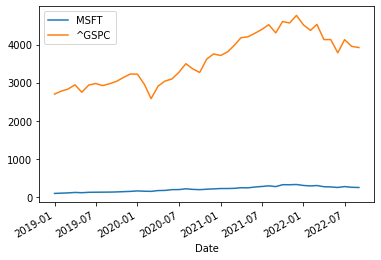

In [10]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

At simple sight it looks like the GSPC has had a better performance, but this is misleading since both have differente range of prices. 

When comparing the performance of 2 or more stock prices and/or indexes, it is a good idea to generate an index for each series.

In [11]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

The growth factor is like an index of the original variable. 

<Figure size 432x288 with 0 Axes>

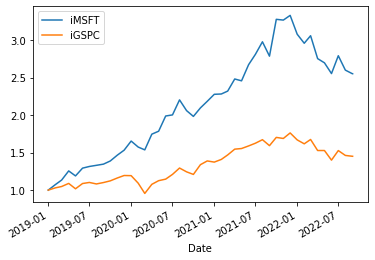

In [12]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

Now we have a better picture of who had a better performance. The line of each instrument represents how much money invested the instrument would have been changing over time. 

Nexxt we calculate continuously compouned monthly returns.

In [13]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


To learn about the possible relationship between the GSPC and MSFT we can look at their proces and also we can look at their returns.

We start with a scatter plot to see wheter there is a linear relationship between the MSFT aprices and the GSPC index:

<Figure size 432x288 with 0 Axes>

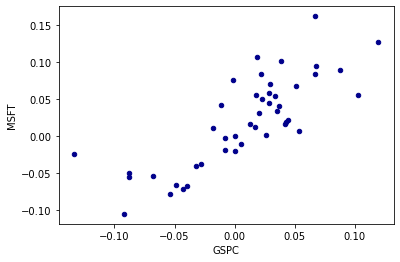

In [14]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

What do you see?

> INTERPRETATION:

WE CAN SEE HOW A LOT OF THE DOTS ARE SCATTER DIFFERENTLY BUT CLOSELY SIMILAR, WE COULD SEE A LINEAR RELATIONSHIP WITH MAYBE A HIGH ERROR. 

We can aslo do a scatter plot to visualize the relantionship between the MSFT returns and GSPC returns:

<Figure size 432x288 with 0 Axes>

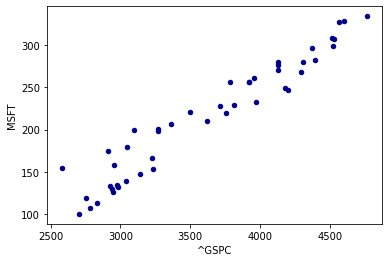

In [15]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

What do you see?

> INTERPRETATION:

WE CAN SEE THIS ONE HAS A STRONGER LINEAR RELATIONSHIP AND THE VALUES ARE MORE CLOSE TO ONE ANOTHER. 

The scatter plot using the proces conveys an apparent stronger linear relationship compared to the scatter plot using returns.

Stock values are variables that usually does NOT grow over time.

<Figure size 432x288 with 0 Axes>

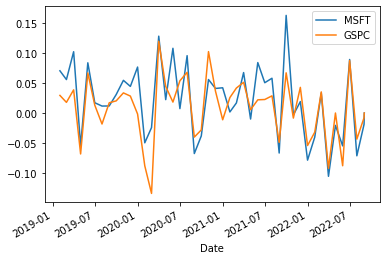

In [16]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

Stock returns behave like a stationary variable since they do not have a growing or declining trend over time. A stationary variable is a variable that has a similar average and standard deciation in any time period. 

Stock prices are variables that usually grow over time. These variables are calles non-stationary variables. 

We have to be careful when looking at linear relationships when using non-stationary values, like stock prices. Is is very likely we end up with spurius measures of linear relationships.

**4.1 Covariance**

The covariance is the average of product deviations between X and Y from their corresponding maths. 

For a sample of N and 2 random variables X and Y, we can calculate the population covariance as
an average like:

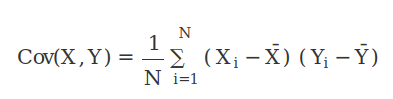

The covariance is also defines as the expected value of the product deviations:

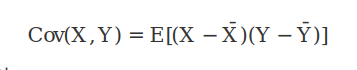

Doing some math, we can express the covariance as:

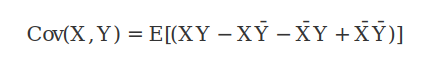

The sample covariance formula is very similar but it dives by N-1 instead of N to get the average of product deviations:

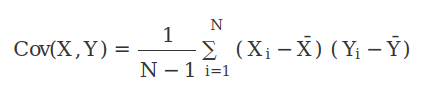

The sample formula will calculate a more conservative than the population formula. 

Sample covariance will always be a little greater than populations covariance, but they will be very similar. 

If Cov(X,Y)>0 we can say that, on average there is a linear positive relationship between X and Y, if the case is opossite we can say the relationship is negative. 

A positive linear relationship between X ad Y means that if X increases, it is likely that Y will also increase, and same case if it decreases.

However a negative linear relationshio value between X and Y means that if X increases, it is more likely that Y will decrease, and if X decreases, it is likely that Y will increase. 

If we can test that Cov(X, Y) is positive and significant, we need to do a hypothesis test. 

There is no constraint on the possible values of Cov(X,Y) that we can get:

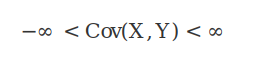
We can interpret the sign of covariance but we cannot onterpret its magnitud. 

The correlation between X and Y is a standarized measure of the covariance. 

**4.2 Correlation**

Correlation is a very practical mesure of linear relationship betwwn 2 random varibales. 

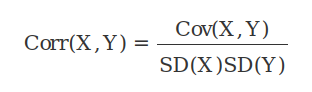

If we divide Cov(X,Y) by the product of the std deviations of X and Y, we get the correlations, which can hace values between -1 and +1. 

if Corr(X,Y) = +1 means that X moves exactly in the same way that Y. 

If Corr(X,Y) = -1 means that Y moves exactly proportional to X, but in the opposite direction. 

If Corr(X,Y) = 0 means the movements of Y are not related to the movements of X.

If -1 Corr(X,Y)< 0 means there is a negative linear relationship between x and Y. 

If Corr(X,Y) = -0.50 that means that if X increases, there is probability of 50% that Y will decrease. If Corr is possitive Y will increase. 

If we want to test that Corr(X,Y) is possitive and significant, we need to do a hypothesis test. 

The formula fot the std error is:

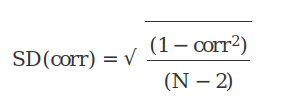

Then, the t.statistic for the hypothesis test will be:

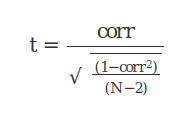

If Corr(X,Y) > 0 and t > 2, then we can say we have a 95% confidence that there is a positive linear relationship. 

**4.3 Calculating Covariance and Correlation**

We can calculate covariance following the formula. 

In [17]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.0025279371243843956

To calculate the covariance:

In [18]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00363455, 0.00252794],
       [0.00252794, 0.00277503]])

The function calculates the covariance matrix using both returns. 

To extract the covariance betwwen MSFT and GSPC returns we can extract the element

In [19]:
cov = covm[0,1]
cov

0.0025279371243843956

The value is the same as the one obtained with the formula. 

Now for the correlation:

In [20]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.79598952],
       [0.79598952, 1.        ]])

The correlation matrix will have +1 in its diagonal since the correlation of one variable with itself is +1. 

We could also use the formula:

In [21]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7959895236595654

Or we can use the scipy funcion

In [22]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7959895236595654, 6.330143484268882e-11)

The p value is almost 0. MSFT and GSPC returns have a positive and very significant correlation (at the 99.99% confidence level) 